# **INTRODUCTION**

* In the mass production of tires, which is characterized by a large number of manufactured items, it is very difficult to conduct the final quality inspection, considering the visual and qualitative aspects of the tires before they are placed on the market. Visual content without defects is representative of a high-quality product. To ensure high quality in the mass production of tires, it is necessary to obtain data from the manufacturing process and to digitize thefinal quality inspection before the product leaves the factory. 


* The current trend is to apply processes from Industry 4.0, focused on automation, machine learning, sensory systems, digitization within manufacturing processes, data visualization, etc. Most applications of machine learning are based on integrating supervised methods, such as convolutional neural networks (CNN), deep learning, and regression, with unsupervised methods, such as clustering algorithms. 

* The proposed approach have all computation that will happened in background as the solution is based on Convolutional Neural Network (CNN), Recurrent Neural Network (RNN), VGG16 Model, ResNet Model based deep learning model and that model need to train on thousands or lakhs of tire profile picture as well as tire tread pictures.

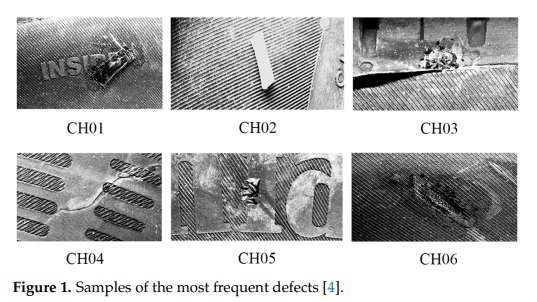

In [1]:
from IPython.display import Image
Image("/kaggle/input/tire-texture/Tire defects profile.png")

# **LITERATURE REVIEW**

* In this system our aim is to develop a system using machine learning or deep learning approach i.e. supervised learning algorithm approach or Unsupervised Learning approach depending on the performance.

* Firstly we need to gather various images vendor and tire type wise then we need classify that data set according to test dataset and training dataset approach. 

* In this problem we will explore various deep learning algorithms which are based on Convolutional Neural Network (CNN) and Recurrent Neural Network (RNN), YOLO, Long Short-Term Memory (LSTM), ResNet, VGG16 etc.
* From those various algorithmic approaches, we analyses which is better. More number of images gives more accuracy in result of our output which is nearer to 99.99%.

* The objects captured by the camera may decrease in quality when using an inappropriate hardware setup, which can affect the accuracy of the inspection system. Based on these considerations, we defined the following hypotheses:

1. Hypothesis 1 (H1). Is there the possibility to automate the polar transform procedure (Data Augumentation) of the captured part of the tires ?
2. Hypothesis 2 (H2). Is it possible to compensate for inaccuracies in visual data captured by camera due to the use of inappropriately set up hardware?
3. Hypothesis 3 (H3). Are deep learning techniques applicable to defect detection in visual data from sensors?
4. Hypothesis 4 (H4). What is an appropriate design and application for a hybrid system integrating unsupervised learning for defect detection on tire profiles?

* In this system, we will explore various deep learning frameworks i.e. TensorFlow, keras, pytorch, etc. as  these frameworks is better for developing and maintaining source code.

# **REFERENCES**

**Research Paper: quality-inspection-of-tire-using-deep-learning-based-computer-vision-IJERTV8IS110337**

**Research Paper: Analysis of the Possibilities of Tire-Defect Inspection**

# **Importing Libraries**

In [2]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# **SPECIFYING IMAGE PATH, RESIZING THE IMAGES AND CONVERTING THEM INTO TRAIN AND TEST BATCHES**

In [3]:
train_path = "../input/tire-texture-image-recognition/Tire Textures/training_data"
test_path = "../input/tire-texture-image-recognition/Tire Textures/testing_data"

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 703 images belonging to 2 classes.
Found 325 images belonging to 2 classes.


In [5]:
len(train_batches)

71

In [6]:
len(test_batches)

33

# **MODEL DEPLOYMENT**

# CNN (CONVOLUTIONAL NEURAL NETWORK) Model

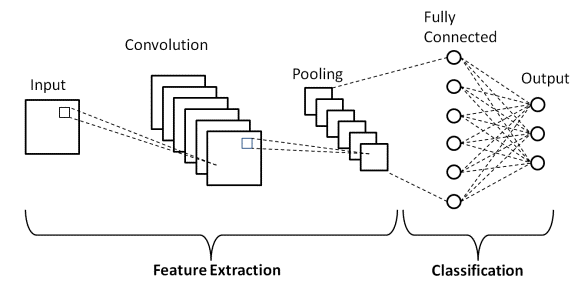

In [7]:
Image("/kaggle/input/architectures/CNN ARCH.png")

**DATA AUGMENTATION**

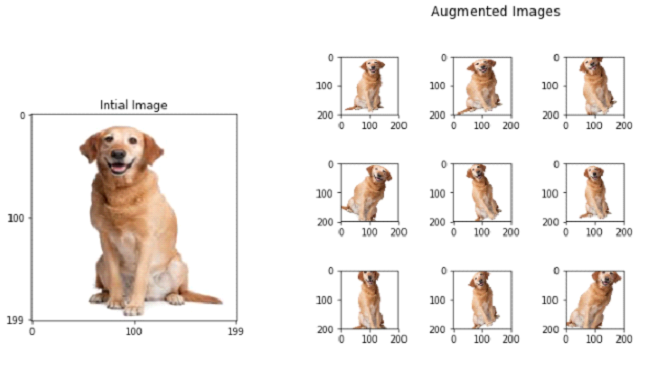

In [8]:
Image("/kaggle/input/architectures/augm.png")

In [9]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(224,224,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

2022-11-28 01:09:16.118803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 01:09:16.119809: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 01:09:16.236679: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 01:09:16.237554: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 01:09:16.238292: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [10]:
model1 = Sequential([
  data_augmentation,
  layers.Conv2D(16, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(32, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(64, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(128, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Conv2D(180, (3,3), 1, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2), strides=2),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation='softmax')
])

In [11]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)       

In [12]:
# MODEL COMPILATION

model1.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
def create_callbacks():
    
    cpk_path = './best_model.h5'
    
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        filepath=cpk_path,
        monitor='val_binary_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1,
    )

    reducelr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_binary_accuracy',
        mode='max',
        factor=0.1,
        patience=3,
        verbose=0
    )

    earlystop = tf.keras.callbacks.EarlyStopping(
        monitor='val_binary_accuracy',
        mode='max',
        patience=10, 
        verbose=1
    )
    
    callbacks = [checkpoint, reducelr, earlystop]         
    
    return callbacks

In [14]:
# TRAINING THE MODEL ON TRAIN BATCHES AND VALIDATING THEM WITH THE TEST BATCHES

callbacks = create_callbacks()
hist1 = model1.fit(train_batches, callbacks=callbacks ,validation_data=test_batches, shuffle=True, batch_size=5 , epochs=5)

2022-11-28 01:09:20.634502: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-11-28 01:09:23.685612: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


71/71 [==============================] - 68s 823ms/step - loss: 1.0872 - accuracy: 0.6444 - val_loss: 0.6907 - val_accuracy: 0.6338
Epoch 2/5
71/71 [==============================] - 46s 648ms/step - loss: 0.6905 - accuracy: 0.6558 - val_loss: 0.6496 - val_accuracy: 0.6585
Epoch 3/5
71/71 [==============================] - 45s 642ms/step - loss: 0.6067 - accuracy: 0.6942 - val_loss: 0.5640 - val_accuracy: 0.7169
Epoch 4/5
71/71 [==============================] - 46s 645ms/step - loss: 0.6006 - accuracy: 0.6700 - val_loss: 0.5899 - val_accuracy: 0.7169
Epoch 5/5
71/71 [==============================] - 45s 645ms/step - loss: 0.5938 - accuracy: 0.7155 - val_loss: 0.5085 - val_accuracy: 0.7538


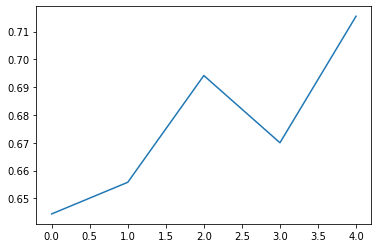

In [15]:
plt.plot(hist1.history["accuracy"])
# plt.plot(hist1.history["val_accuracy"])

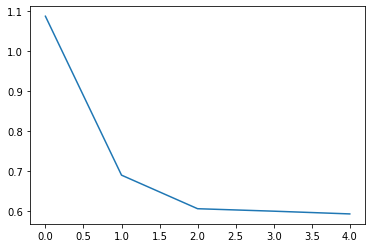

In [16]:
plt.plot(hist1.history["loss"])
#plt.plot(hist1.history["val_accuracy"])

In [17]:
# PREDECTION OF MODEL ON TEST BATCHES

pred = model1.predict(test_batches)
y_classes = [np.argmax(i) for i in pred]

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[182  28]
 [ 52  63]]


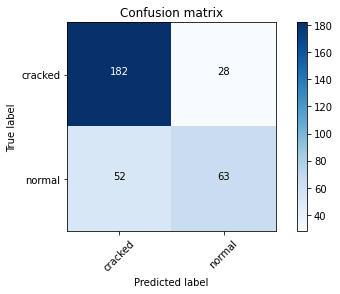

In [19]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=y_classes)
plot_confusion_matrix(cm=cm, classes=["cracked","normal"])

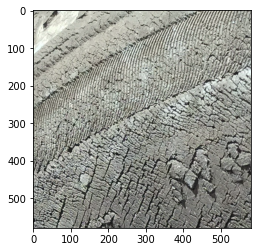

[[0.50166035 0.49833968]]
0


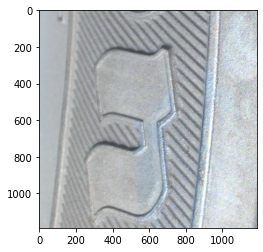

[[0.49790692 0.502093  ]]
1


In [72]:
def predict(image):
    img = cv2.imread(image)
    plt.imshow(img)
    plt.show()
    #resize = tf.image.resize(img, (50,50))
    resize = cv2.resize(img, (224,224))
    #print(np.expand_dims(resize,0).shape)
    pred = model1.predict(np.expand_dims(resize/255,0))
    print(pred)
    y_classes = np.argmax(pred)
    print(y_classes)
    
predict("/kaggle/input/tire-texture-image-recognition/Tire Textures/training_data/cracked/Cracked-165.jpg")
predict("/kaggle/input/tire-texture-image-recognition/Tire Textures/training_data/normal/NewNormal117.jpg")

In [21]:
test_batches.class_indices

{'cracked': 0, 'normal': 1}

In [22]:
model1.evaluate(test_batches)

33/33 [==============================] - 19s 574ms/step - loss: 0.5085 - accuracy: 0.7538


[0.5085204839706421, 0.7538461685180664]

# VGG16 Model

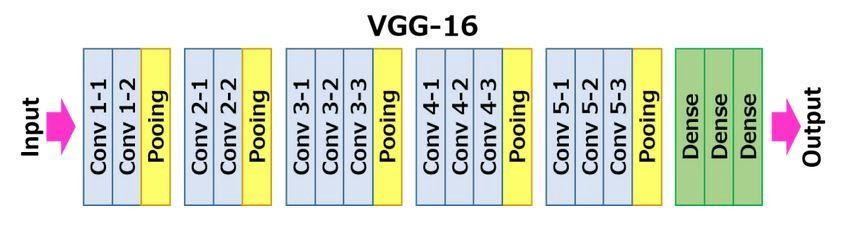

In [23]:
Image("/kaggle/input/architectures/VGG16 ARCH2.png")

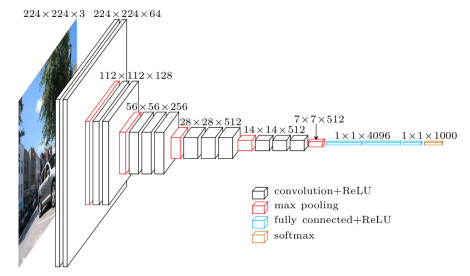

In [24]:
Image("/kaggle/input/architectures/VGG16 ARCH.png")

In [25]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 3s 0us/step


In [26]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [27]:
model2 = Sequential()
for layer in vgg16_model.layers[:-1]:
    model2.add(layer)
    
for layer in model2.layers:
    layer.trainable = False
    
model2.add(Dense(units=2, activation="softmax"))

In [28]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [29]:
# MODEL COMPILATION

model2.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [30]:
# TRAINING THE MODEL ON TRAIN BATCHES AND VALIDATING THEM WITH THE TEST BATCHES


hist2 = model2.fit(x=train_batches, validation_data=test_batches, shuffle=True, batch_size=5 , epochs=5)

Epoch 1/5
71/71 [==============================] - 53s 706ms/step - loss: 0.4860 - accuracy: 0.7752 - val_loss: 0.8358 - val_accuracy: 0.6523
Epoch 2/5
71/71 [==============================] - 47s 662ms/step - loss: 0.2694 - accuracy: 0.9004 - val_loss: 0.7480 - val_accuracy: 0.7046
Epoch 3/5
71/71 [==============================] - 47s 661ms/step - loss: 0.2194 - accuracy: 0.9189 - val_loss: 0.7321 - val_accuracy: 0.7077
Epoch 4/5
71/71 [==============================] - 46s 653ms/step - loss: 0.1949 - accuracy: 0.9275 - val_loss: 0.5993 - val_accuracy: 0.7631
Epoch 5/5
71/71 [==============================] - 47s 664ms/step - loss: 0.1792 - accuracy: 0.9374 - val_loss: 0.6044 - val_accuracy: 0.7600


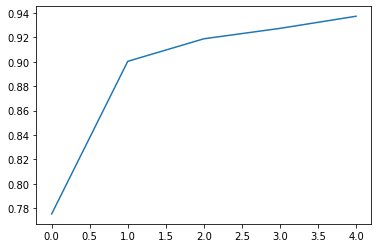

In [31]:
plt.plot(hist2.history["accuracy"])
#plt.plot(hist2.history["val_accuracy"])

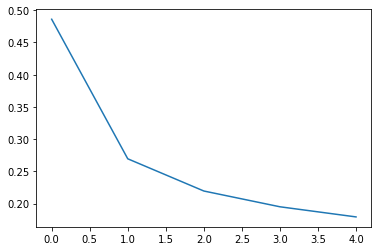

In [32]:
plt.plot(hist2.history["loss"])
#plt.plot(hist2.history["val_accuracy"])

In [33]:
pred = model2.predict(test_batches)
y_classes = [np.argmax(i) for i in pred]

Confusion matrix, without normalization
[[143  67]
 [ 11 104]]


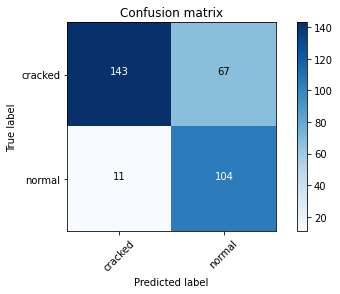

In [34]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=y_classes)
plot_confusion_matrix(cm=cm, classes=["cracked","normal"])

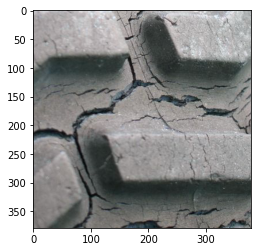

[[0.58042    0.41957998]]
0


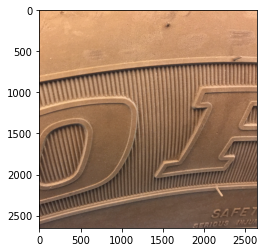

[[0.25693205 0.743068  ]]
1


In [62]:
def predict(image):
    img = cv2.imread(image)
    plt.imshow(img)
    plt.show()
    #resize = tf.image.resize(img, (50,50))
    resize = cv2.resize(img, (224,224))
    #print(np.expand_dims(resize,0).shape)
    pred = model2.predict(np.expand_dims(resize/255,0))
    print(pred)
    y_classes = np.argmax(pred)
    print(y_classes)
    
predict("/kaggle/input/tire-texture-image-recognition/Tire Textures/training_data/cracked/Cracked-10.jpg")
predict("/kaggle/input/tire-texture-image-recognition/Tire Textures/training_data/normal/IMG_4420.jpg")

In [36]:
test_batches.class_indices

{'cracked': 0, 'normal': 1}

In [37]:
model2.evaluate(test_batches)

33/33 [==============================] - 20s 606ms/step - loss: 0.6044 - accuracy: 0.7600


[0.6044173240661621, 0.7599999904632568]

# RESNET Model

In [38]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Model

In [39]:
pretrained_model = ResNet50(input_shape=(224,224, 3),include_top=False,weights='imagenet',pooling='max')
pretrained_model.trainable = False

inputs = pretrained_model.input

x = Dense(120, activation='relu')(pretrained_model.output)
x = Dense(120, activation='relu')(x)#adding some custom layers of our coice

outputs = Dense(2, activation='sigmoid')(x)
#output choice
model3 = Model(inputs=inputs, outputs=outputs)

94781440/94765736 [==============================] - 0s 0us/step


In [40]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [41]:
model3.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [42]:
callbacks = create_callbacks()
hist3 = model3.fit(x=train_batches, validation_data=test_batches,callbacks=callbacks, shuffle=True, epochs=5)

Epoch 1/5
71/71 [==============================] - 51s 671ms/step - loss: 0.6014 - accuracy: 0.8065 - val_loss: 1.0104 - val_accuracy: 0.6400
Epoch 2/5
71/71 [==============================] - 46s 655ms/step - loss: 0.1854 - accuracy: 0.9346 - val_loss: 0.9630 - val_accuracy: 0.6615
Epoch 3/5
71/71 [==============================] - 46s 655ms/step - loss: 0.0884 - accuracy: 0.9701 - val_loss: 0.6843 - val_accuracy: 0.7323
Epoch 4/5
71/71 [==============================] - 46s 649ms/step - loss: 0.0452 - accuracy: 0.9915 - val_loss: 0.7877 - val_accuracy: 0.7200
Epoch 5/5
71/71 [==============================] - 47s 662ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 0.8321 - val_accuracy: 0.7108


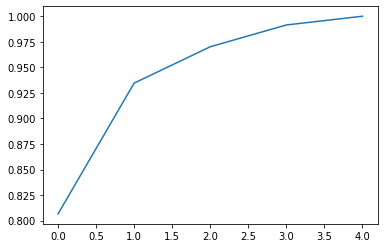

In [43]:
plt.plot(hist3.history["accuracy"])
#plt.plot(hist3.history["val_accuracy"])

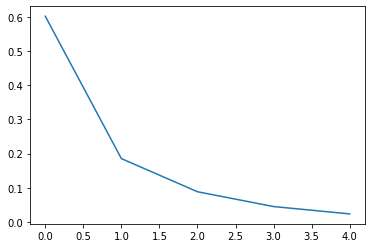

In [44]:
plt.plot(hist3.history["loss"])
#plt.plot(hist3.history["val_accuracy"])

In [45]:
pred = model3.predict(test_batches)
y_classes = [np.argmax(i) for i in pred]

Confusion matrix, without normalization
[[124  86]
 [  8 107]]


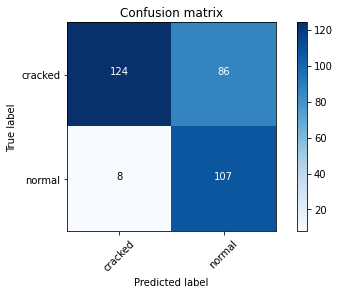

In [46]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=y_classes)
plot_confusion_matrix(cm=cm, classes=["cracked","normal"])

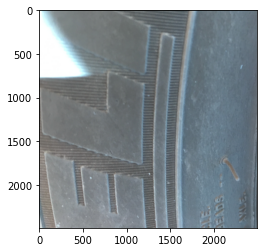

[[0.5419739  0.15659213]]
0


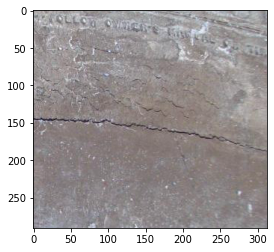

[[0.5363624  0.15965873]]
0


In [66]:
def predict(image):
    img = cv2.imread(image)
    plt.imshow(img)
    plt.show()
    #resize = tf.image.resize(img, (50,50))
    resize = cv2.resize(img, (224,224))
    #print(np.expand_dims(resize,0).shape)
    pred = model3.predict(np.expand_dims(resize/255,0))
    print(pred)
    y_classes = np.argmax(pred)
    print(y_classes)
predict("/kaggle/input/tire-texture-image-recognition/Tire Textures/training_data/normal/NewNormal114.jpg")
predict("/kaggle/input/tire-texture-image-recognition/Tire Textures/training_data/cracked/Cracked-174.jpg")

In [48]:
test_batches.class_indices

{'cracked': 0, 'normal': 1}

In [49]:
model3.evaluate(test_batches)

33/33 [==============================] - 19s 596ms/step - loss: 0.8321 - accuracy: 0.7108


[0.8321031928062439, 0.7107692360877991]